### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('Etherium.csv')

In [4]:
df.head()

,unix,date,symbol,open,high,low,close,Volume USD,Volume ETH
0,1705881600000,2024-01-22 0:00:00,ETH/USD,2462.5,2467.5,2456.9,2458.4,6.644583e+04,27.028079
1,1705795200000,2024-01-21 0:00:00,ETH/USD,2475.8,2486.7,2456.5,2458.0,2.735119e+06,1112.741651
2,1705708800000,2024-01-20 0:00:00,ETH/USD,2493.4,2494.0,2457.6,2473.3,6.360948e+06,2571.846547
3,1705622400000,2024-01-19 0:00:00,ETH/USD,2470.9,2507.6,2418.6,2494.1,2.187753e+07,8771.713169
4,1705536000000,2024-01-18 0:00:00,ETH/USD,2530.4,2549.1,2428.6,2471.0,1.198226e+07,4849.153557


In [5]:
df.tail()

,unix,date,symbol,open,high,low,close,Volume USD,Volume ETH
2872,1457740800,2016-03-12 0:00:00,ETH/USD,11.95,13.45,11.95,12.92,3057.52,237.78
2873,1457654400,2016-03-11 0:00:00,ETH/USD,11.75,11.95,11.75,11.95,607.42,50.85
2874,1457568000,2016-03-10 0:00:00,ETH/USD,11.20,11.85,11.07,11.75,12.09,1.03
2875,1457481600,2016-03-09 0:00:00,ETH/USD,10.30,11.20,10.10,11.20,448.43,41.17
2876,1457481600,2016-03-09 0:00:00,ETH/USD,10.30,11.20,10.10,11.20,448.43,41.17


In [6]:
df1=df.reset_index()['close']

In [7]:
df1

0       2458.40
1       2458.00
2       2473.30
3       2494.10
4       2471.00
         ...   
2872      12.92
2873      11.95
2874      11.75
2875      11.20
2876      11.20
Name: close, Length: 2877, dtype: float64

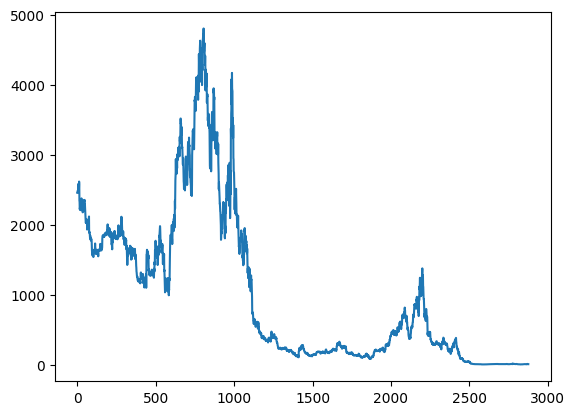

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [9]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [10]:
import numpy as np

In [11]:
df1

0       2458.40
1       2458.00
2       2473.30
3       2494.10
4       2471.00
         ...   
2872      12.92
2873      11.95
2874      11.75
2875      11.20
2876      11.20
Name: close, Length: 2877, dtype: float64

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
print(df1)

[[0.51070679]
 [0.51062347]
 [0.51381057]
 ...
 [0.00105154]
 [0.00093697]
 [0.00093697]]


In [14]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size

(1870, 1007)

In [16]:
train_data

array([[0.51070679],
       [0.51062347],
       [0.51381057],
       ...,
       [0.01773696],
       [0.01717244],
       [0.01780986]])

In [17]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(1769, 100)
(1769,)


(None, None)

In [20]:
print(X_test.shape), print(ytest.shape)

(906, 100)
(906,)


(None, None)

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, Model

In [23]:
### Create the Stacked LSTM model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [24]:
from keras.layers import Input, Dense
from keras.models import Model

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [26]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
28/28 [==============================] - 64s 1s/step - loss: 0.0276 - val_loss: 5.8918e-04
Epoch 2/100
28/28 [==============================] - 21s 738ms/step - loss: 0.0028 - val_loss: 3.0700e-04
Epoch 3/100
28/28 [==============================] - 18s 654ms/step - loss: 0.0022 - val_loss: 2.5392e-04
Epoch 4/100
28/28 [==============================] - 18s 634ms/step - loss: 0.0020 - val_loss: 2.2895e-04
Epoch 5/100
28/28 [==============================] - 20s 712ms/step - loss: 0.0019 - val_loss: 2.3985e-04
Epoch 6/100
28/28 [==============================] - 16s 585ms/step - loss: 0.0017 - val_loss: 2.0487e-04
Epoch 7/100
28/28 [==============================] - 19s 696ms/step - loss: 0.0015 - val_loss: 2.0509e-04
Epoch 8/100
28/28 [==============================] - 18s 658ms/step - loss: 0.0015 - val_loss: 1.8472e-04
Epoch 9/100
28/28 [==============================] - 19s 666ms/step - loss: 0.0014 - val_loss: 1.9465e-04
Epoch 10/100
28/28 [=============================

In [27]:
tf.__version__

'2.13.0'

In [28]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

29/29 [==============================] - 3s 87ms/step


In [29]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1764.8487948597322

In [31]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

373.9146749294386

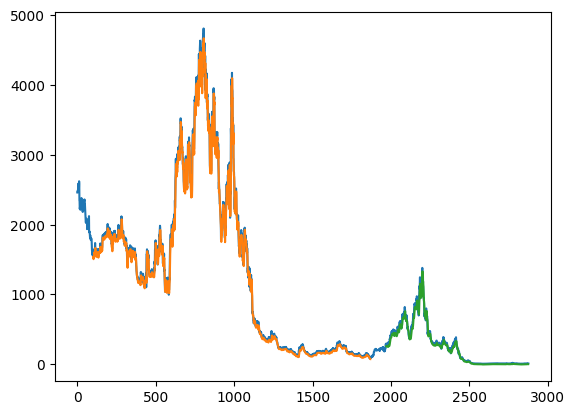

In [32]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
len(test_data)

1007

In [34]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 666)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [36]:
temp_input

[0.1774941371887419,
 0.15534689636582777,
 0.15207855354687064,
 0.1407153858748431,
 0.15098493979291747,
 0.14679796142063967,
 0.1520118951847249,
 0.15479279873049148,
 0.14646258653609404,
 0.13606388204136236,
 0.13870938578902048,
 0.12946053804130236,
 0.16253558410847985,
 0.16420620930975685,
 0.1652456631444666,
 0.16191482811099786,
 0.14624802993293753,
 0.14092994247799961,
 0.13989673786474102,
 0.1416090245423591,
 0.14247974939788755,
 0.1308520313510942,
 0.10593430235149871,
 0.08801778445102049,
 0.09461696230344638,
 0.09071536504410493,
 0.08505565348317022,
 0.0847827708131362,
 0.09273178049901284,
 0.09546685642080426,
 0.09431908274760771,
 0.09349001936842036,
 0.09456488545802004,
 0.08863645737468541,
 0.08616384875384275,
 0.09558350855455926,
 0.09722497072239751,
 0.09525854903909889,
 0.09525854903909889,
 0.0966146300940008,
 0.08300799192100651,
 0.07786071651906701,
 0.07359458134174118,
 0.07524854195248176,
 0.07249055221870276,
 0.070819927017425

In [37]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=665
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [1.55346896e-01 1.52078554e-01 1.40715386e-01 1.50984940e-01
 1.46797961e-01 1.52011895e-01 1.54792799e-01 1.46462587e-01
 1.36063882e-01 1.38709386e-01 1.29460538e-01 1.62535584e-01
 1.64206209e-01 1.65245663e-01 1.61914828e-01 1.46248030e-01
 1.40929942e-01 1.39896738e-01 1.41609025e-01 1.42479749e-01
 1.30852031e-01 1.05934302e-01 8.80177845e-02 9.46169623e-02
 9.07153650e-02 8.50556535e-02 8.47827708e-02 9.27317805e-02
 9.54668564e-02 9.43190827e-02 9.34900194e-02 9.45648855e-02
 8.86364574e-02 8.61638488e-02 9.55835086e-02 9.72249707e-02
 9.52585490e-02 9.52585490e-02 9.66146301e-02 8.30079919e-02
 7.78607165e-02 7.35945813e-02 7.52485420e-02 7.24905522e-02
 7.08199270e-02 6.75536673e-02 6.75036735e-02 6.74682612e-02
 6.82369155e-02 6.38499620e-02 6.19085372e-02 6.38187159e-02
 6.03004042e-02 6.51622985e-02 6.26584438e-02 5.93088611e-02
 6.04503856e-02 6.01858352e-02 6.09878186e-02 6.18189651e-02
 5.79486139e-02 5.87214343e-02 6.18647927e-02 6.25542901e-02
 6.20106078e

In [38]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [39]:
import matplotlib.pyplot as plt

In [40]:
len(df1)

2877

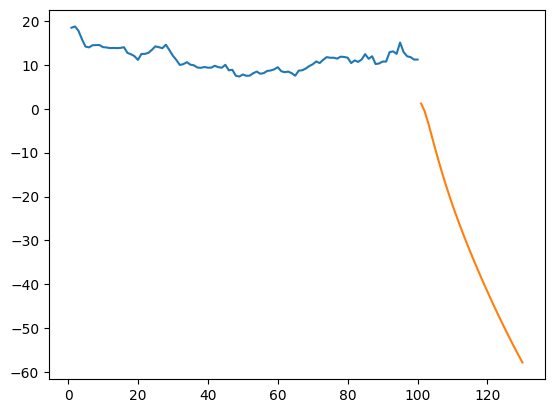

In [41]:
plt.plot(day_new,scaler.inverse_transform(df1[2777:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

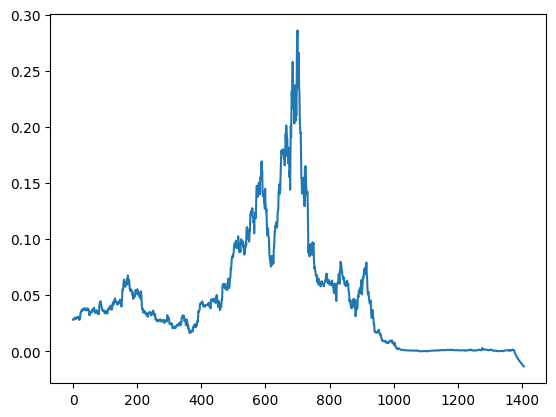

In [42]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1500:])

In [43]:
df3=scaler.inverse_transform(df3).tolist()

In [44]:
print(df3)

[[2458.4], [2457.9999999999995], [2473.3], [2494.1], [2471.0], [2530.8], [2586.7], [2514.6], [2472.7], [2576.2], [2524.0], [2620.0], [2580.4], [2344.1], [2333.0], [2224.1], [2242.0], [2270.1], [2270.8], [2211.8], [2356.7], [2352.5], [2284.9], [2293.5], [2302.7], [2348.0], [2379.6], [2234.0], [2275.0], [2267.1], [2312.8], [2330.0], [2241.5], [2203.7], [2180.5], [2219.4], [2197.7], [2231.7], [2220.8], [2319.1], [2262.5], [2204.4], [2226.9], [2354.6], [2341.9], [2358.3], [2357.5], [2235.7], [2294.7], [2241.2], [2191.5], [2163.9], [2087.1], [2052.0], [2028.5], [2046.0], [2029.1], [2061.7], [2084.5], [2079.7], [2062.5], [2063.9], [1934.1], [2021.6], [2012.6000000000001], [1962.9000000000003], [1961.8], [1962.0], [2059.5], [1980.0], [2055.2], [2044.2], [2053.3], [2077.4], [2120.9], [1889.1], [1888.9], [1902.0999999999997], [1895.3], [1859.1], [1834.6], [1801.0999999999997], [1848.4], [1817.2000000000003], [1810.1], [1796.0], [1777.6], [1780.6], [1804.8999999999999], [1787.4], [1786.5], [1766

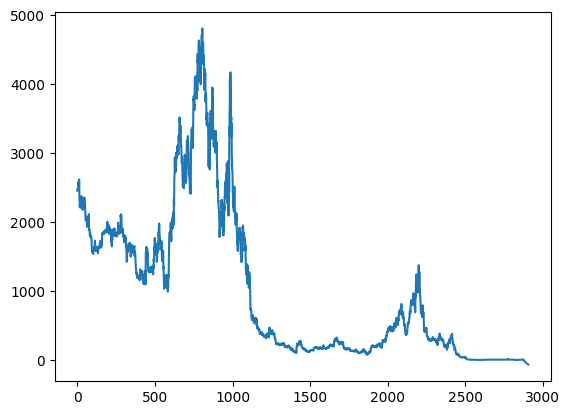

In [45]:
plt.plot(df3)

In [46]:
import pickle

In [47]:
pickle.dump(df3,open('etherium.pkl','wb'))